In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett

In [4]:
#Lectura de datos
df = pd.read_excel('./DATOS.xlsx')
df

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5
0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0
430,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
431,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
432,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [5]:
# Descripción estadistica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,434.0,0.857143,0.350331,0.0,1.00,1.0,1.0,1.0
A2,434.0,0.476959,0.500045,0.0,0.00,0.0,1.0,1.0
A3,434.0,0.495392,0.500556,0.0,0.00,0.0,1.0,1.0
A4,434.0,0.629032,0.483621,0.0,0.00,1.0,1.0,1.0
A5,434.0,0.702765,0.457568,0.0,0.00,1.0,1.0,1.0
B1,434.0,0.679724,0.467121,0.0,0.00,1.0,1.0,1.0
B2,434.0,0.817972,0.386313,0.0,1.00,1.0,1.0,1.0
B3,434.0,0.778802,0.415533,0.0,1.00,1.0,1.0,1.0
B4,434.0,0.801843,0.399071,0.0,1.00,1.0,1.0,1.0
B5,434.0,0.500000,0.500577,0.0,0.00,0.5,1.0,1.0


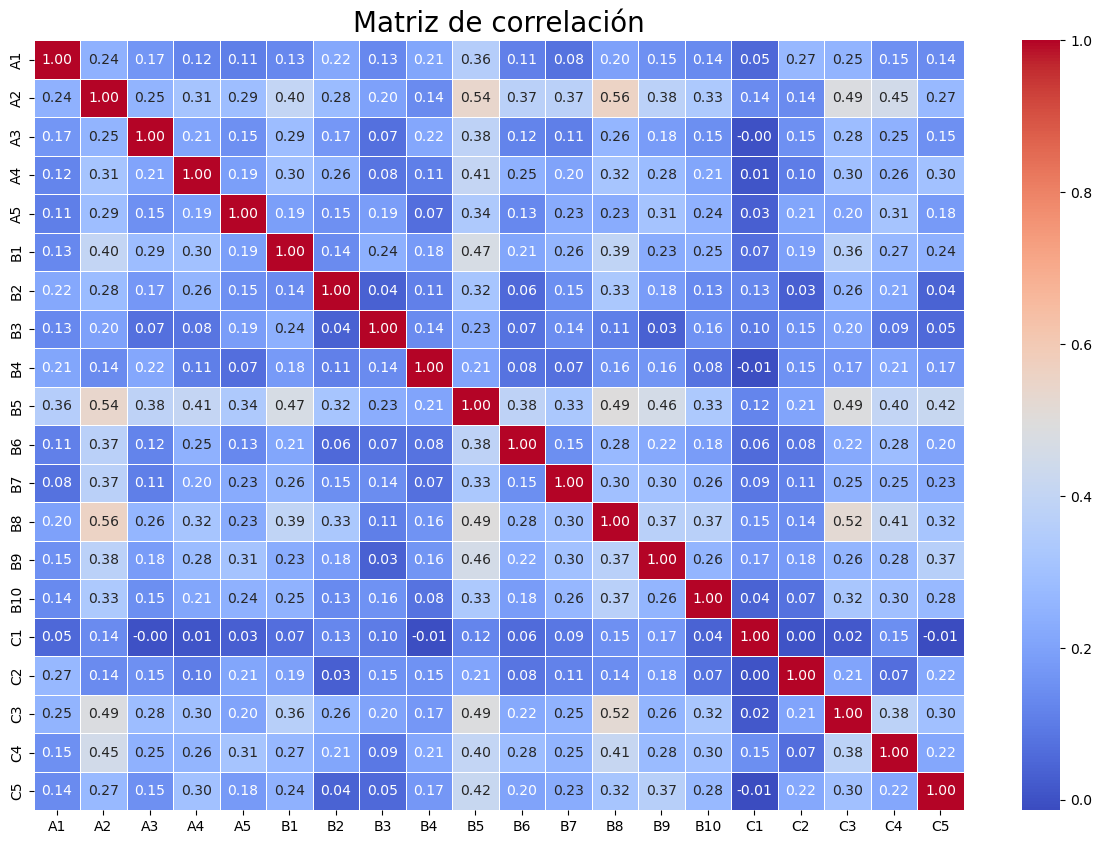

In [6]:
# Matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title('Matriz de correlación', fontsize=20)
plt.show()

Si los valores de correlación entre items son altos (>0.2), el AFE es viable. Si no, el AFE no es viable.

In [7]:
# Test de Esfericidad de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)


print(f'Prueba de test de Bartlett: {chi_square_value:.4f}, p-valor: {p_value}')


Prueba de test de Bartlett: 2010.2447, p-valor: 4.962613296734308e-301


El test de esfericidad de Bartleett tiene como hipotesis nula que la correlación entre las dimensiones del dataset es igual a 0. Si esto se cumple nuestro dataset no tendría correlación entre sus variables, por lo que no sería viable aplicar un análisis factorial.

*Dado que tenemos un p-valor igual a 0 podemos rechazar la hipotesis nula h_0., las variables estan relacionadas y podemos hacer AFE*


In [8]:
# TEST KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

print(f'KMO General: {kmo_model:.4f}')

KMO General: 0.8905


/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


La medida de adecuación de KMO nos dice que tan viable es aplicar un modelo de análisis factorial sobre nuestro datos, donde con un valor menor a 0.6 no tendríamos buenos resultados.

In [9]:
# Número de factores, > 1

fa = FactorAnalyzer(n_factors=20, rotation=None)
fa.fit(df)
ev, _= fa.get_eigenvalues()
print("Autovalores:", ev)


Autovalores: [5.49473872 1.31647704 1.17260983 1.12962133 1.03324126 0.95335703
 0.90955919 0.86897171 0.86029099 0.80686956 0.75033952 0.70110101
 0.62987775 0.61474135 0.59519719 0.5347214  0.4628376  0.44708623
 0.39443536 0.32392594]


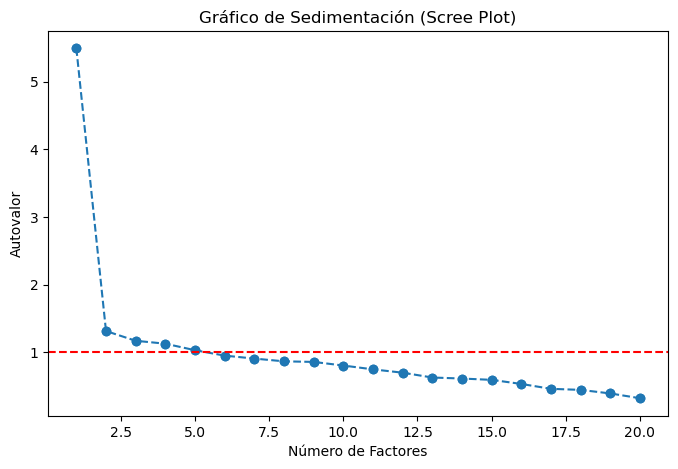

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev, marker="o", linestyle="--")
plt.xlabel("Número de Factores")
plt.ylabel("Autovalor")
plt.title("Gráfico de Sedimentación (Scree Plot)")
plt.axhline(y=1, color='r', linestyle='--')  # Regla de Kaiser (factores con autovalor > 1)
plt.show()


En la gráfica de autovalores podemos apreciar que después del quinto factor la varianza es minima, por lo tanto usaremos 5 factores para nuestra solución.

In [11]:
#EFA

# APlicamos el modelo con 5 factores, con una rotación ortogonal y usando el método de Ejes Principales
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal', use_smc=True)
fa.fit(df)


loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'factor 4', 'factor 5'], index=df.columns)
communalities = pd.DataFrame(fa.get_communalities().reshape(-1, 1), columns=['Communalities'], index=df.columns)

loadings = loadings.join(communalities)


variance = pd.DataFrame(fa.get_factor_variance(), columns=['Factor 1', 'Factor 2', 'Factor 3', 'factor 4', 'factor 5'], index=['variance', 'proportional_variance', 'cumulative_variances'])


In [12]:
variance

,Factor 1,Factor 2,Factor 3,factor 4,factor 5
variance,4.146978,1.788792,1.253786,1.201327,1.754859
proportional_variance,0.207349,0.089440,0.062689,0.060066,0.087743
cumulative_variances,0.207349,0.296789,0.359478,0.419544,0.507287


In [13]:
communalities

,Communalities
A1,0.532585
A2,0.604266
A3,0.424309
A4,0.381037
A5,0.372095
B1,0.494273
B2,0.577066
B3,0.737219
B4,0.367359
B5,0.648839


En nuestra solución el factor 1 explica un 20.73% de la varianza total, el factor 2 representa un 29.67% de la varianza total, el factor 3 representa un 35.95% de la varianza total, el factor 4 representa 41,95% de la varianza total y el factor 5 representa el 50.72% de la varianza otal. Sumando entre los cinco factores un 50.72% de la varianza. En este punto hemos logrado explicar con 5 factores la mayor parte de la información de nuestros datos.

In [14]:
# Cargas factoriales
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])
print("Cargas Factoriales:")
print(factor_loadings)


Cargas Factoriales:
     Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
A1   0.063253  0.675895  0.212532  0.051611  0.154651
A2   0.706713  0.110641  0.210705  0.135743  0.172505
A3   0.409735  0.481830 -0.105645 -0.025311 -0.111645
A4   0.545790  0.146245 -0.086266 -0.170426  0.158986
A5   0.246176  0.046473  0.139917  0.220756  0.490940
B1   0.560720  0.181029 -0.107883  0.361523  0.068975
B2   0.359013  0.341087  0.509907 -0.218392 -0.155354
B3   0.132057  0.131372  0.070348  0.834583  0.032309
B4   0.121139  0.584486 -0.077223  0.059151  0.039983
B5   0.652763  0.338106  0.105510  0.079710  0.301559
B6   0.501210 -0.044328 -0.062968 -0.027049  0.158542
B7   0.408773 -0.137324  0.141757  0.182241  0.386713
B8   0.703046  0.158884  0.197082 -0.005749  0.129864
B9   0.358520  0.101417  0.218821 -0.205308  0.629725
B10  0.516256 -0.073228 -0.011545  0.170188  0.238037
C1   0.014178 -0.076966  0.776659  0.112629  0.128467
C2  -0.096666  0.509204 -0.083655  0.229721  0.529807
C3   0.6

Las cargas factoriales > 0 nos explica que tiene mayor correlaciòn entre cada variable original.

In [15]:
from semopy import Model


In [16]:
df = pd.read_excel('./REPORTE DE CAMBIOS DE MEDIDORES_HYO.xlsx')
df.columns

Index(['SUMINISTROS EJECUTADOS', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'CUADRILLA', 'Unnamed: 11', 'DATOS DEL MEDIDOR INSTALADO',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'DATOS DEL MEDIDOR RETIRADO', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'NÚMERO DE FICHA', 'OBSERVACION',
       'COORDENADAS'],
      dtype='object')

In [17]:
df[['Unnamed: 1', 'Unnamed: 2', 'CUADRILLA']]

,Unnamed: 1,Unnamed: 2,CUADRILLA
0,SUMINISTRO,FECHA INTERVENIDA,TÉCNICO 1
1,67314006,2025-02-11 00:00:00,"RICSE CERRON, JAIME"
2,67314033,2025-02-11 00:00:00,"RICSE CERRON, JAIME"
3,67312487,2025-02-11 00:00:00,"VELIZ VALLE, DARWIN CESAR GIOVANI"
4,67314300,2025-02-11 00:00:00,"PEREZ LOAYZA, RAUL ENRIQUE"
...,...,...,...
1041,NaN,NaN,NaN
1042,NaN,NaN,NaN
1043,NaN,NaN,NaN
1044,NaN,NaN,NaN


In [18]:
resultado = df[df.iloc[:, 0] == 67015141]
print(resultado)

Empty DataFrame
Columns: [SUMINISTROS EJECUTADOS, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, CUADRILLA, Unnamed: 11, DATOS DEL MEDIDOR INSTALADO, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, DATOS DEL MEDIDOR RETIRADO, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, NÚMERO DE FICHA, OBSERVACION, COORDENADAS]
Index: []

[0 rows x 36 columns]


In [26]:
import pandas as pd

# Filtrar solo las columnas requeridas
columnas_interes = ['Unnamed: 1', 'Unnamed: 2', 'CUADRILLA']
df_filtrado = df[columnas_interes]

# Filtrar por suministro específico
suministro_buscado = 67315335
resultado = df_filtrado[df_filtrado['Unnamed: 1'] == suministro_buscado]

print(resultado)


   Unnamed: 1           Unnamed: 2            CUADRILLA
43   67315335  2025-02-11 00:00:00  RICSE CERRON, JAIME
